In [12]:

path = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\'
for filename in os.listdir(path)[:-2]:
    allFiles = os.listdir(path + filename)
    pd1 =  pd.read_csv(path+filename+'\\'+allFiles[0])
    pd2 =  pd.read_csv(path+filename+'\\'+allFiles[1])    
    pd3 =  pd.read_csv(path+filename+'\\'+allFiles[2])    
    pd4 =  pd.read_csv(path+filename+'\\'+allFiles[3]) 
    pd5 =  pd.read_csv(path+filename+'\\'+allFiles[4])
    pd5 = pd5.loc[:, pd5.columns!='Referee']
    pd1 = pd1.append(pd2)
    pd1 = pd1.append(pd3)
    pd1 = pd1.append(pd4)
    pd1 = pd1.loc[:, pd1.columns!='Unnamed: 0']
    pd1 = pd1.append(pd5)
    pd1.to_csv(path+filename+'\\'+'merged.csv')

In [20]:
import os
import pandas as pd

In [21]:
path = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\'

In [22]:
import os
import pandas as pd
path = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\'
merged_orig =  pd.read_csv(path+'1213'+'\\'+'merged.csv')
merged_orig = merged_orig.loc[:, merged_orig.columns!='Unnamed: 0']

for filename in os.listdir(path)[1:8]:
    allFiles = os.listdir(path + filename)
    pd1 =  pd.read_csv(path+filename+'\\'+'merged.csv')
    pd1 = pd1.loc[:, pd1.columns!='Unnamed: 0']
    merged_orig = merged_orig.append(pd1)

merged_orig.to_csv(path+'merged_all_new.csv')

In [25]:
os.listdir(path)[1:8]

['1213', '1314', '1415', '1516', '1617', '1718', '1819']

## AVG Creator

In [176]:
import os
import pandas as pd

path = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\'
merged_orig =  pd.read_csv(path+'1213'+'\\'+'merged.csv')
merged_orig = merged_orig.loc[:, merged_orig.columns!='Unnamed: 0']

for filename in os.listdir(path)[1:8]:
    path = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\'
    merged_orig =  pd.read_csv(path+filename+'\\'+'merged.csv')
    merged_orig = merged_orig.loc[:, merged_orig.columns!='Unnamed: 0']
    keys = list(set(merged_orig["HomeTeam"]))
    dict_holder = {k:v for k,v in zip(keys,range(0,len(keys)))}
    
    for indx in list(set(merged_orig["HomeTeam"])):
        dict_holder[indx] = (merged_orig.loc[merged_orig["HomeTeam"] == indx,:]).mean()
        
    pd.DataFrame.from_dict(dict_holder).T.to_csv(path+filename
                                                 +'pot_test_set.csv')

C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_3436/2726905918.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dict_holder[indx] = (merged_orig.loc[merged_orig["HomeTeam"] == indx,:]).mean()


In [177]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Withouth PCA and Standardization

C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_3436/3856667441.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = merged_orig.drop("Unnamed: 0",1).to_numpy()
C:\Users\Kiavosh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


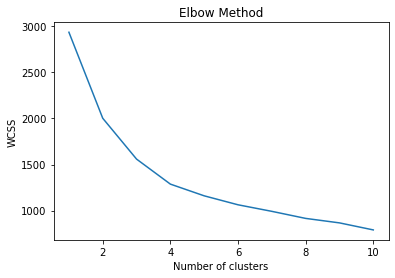

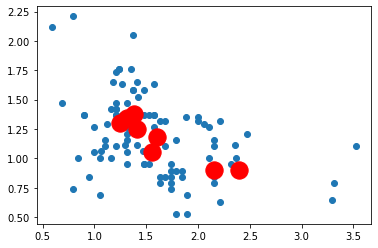

In [178]:
path_Ad = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\1213pot_test_set.csv'
merged_orig =  pd.read_csv(path_Ad)
right_features_Ad = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\merged_All(fixed).csv'
right_features = pd.read_csv(right_features_Ad)
correct_col = [i for i in right_features.columns if i not in ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR']]
merged_orig = merged_orig[correct_col]
X = merged_orig.drop("Unnamed: 0",1).to_numpy()


#--------------- Elbow to find see the best number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

#--------------- Selecting the best n as our n_cluster
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=300, random_state=0)
pred_y = kmeans.fit_predict(X)

#--------------- Viz our clusters
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()



# With PCA and Standardization

C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_3436/513343560.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = merged_orig.drop("Unnamed: 0",1).to_numpy()
C:\Users\Kiavosh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


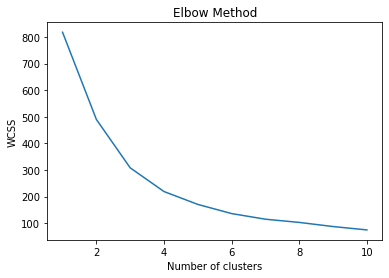

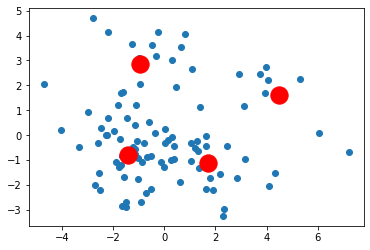

In [180]:
path_Ad = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\1213pot_test_set.csv'
merged_orig =  pd.read_csv(path_Ad)
right_features_Ad = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\merged_All(fixed).csv'
right_features = pd.read_csv(right_features_Ad)
correct_col = [i for i in right_features.columns if i not in ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR']]
merged_orig = merged_orig[correct_col]
X = merged_orig.drop("Unnamed: 0",1).to_numpy()

#--------------- Standardization & PCA
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

#--------------- Elbow to find see the best number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 


#--------------- Selecting the best n as our n_cluster
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=300, random_state=0)
pred_y = kmeans.fit_predict(X)

#--------------- Viz our clusters
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()



In [182]:
len(X[1]) 

2

In [135]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=300, random_state=0)
pred_y = kmeans.fit_predict(X)

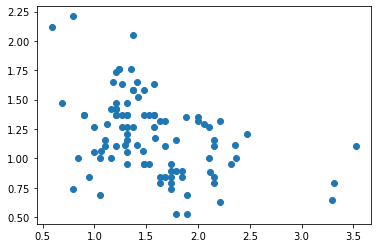

In [136]:
plt.scatter(X[:,0], X[:,1])

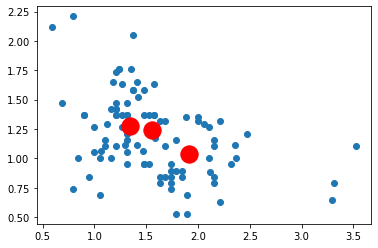

In [137]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

<h1>TODO</h1>
<h4>convert the packages to years and merge </h4>

In [79]:
pip install datapackage

  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7399 sha256=1910c6487b4797fcc2ceb19d0005e1d62ac832a2e4d127bfa8b3238df284742d
  Stored in directory: c:\users\kiavosh\appdata\local\pip\cache\wheels\b5\eb\b6\e409f80d7fec532e4240dda9562cad374257d2dd010b40cfff
Successfully built linear-tsv
Note: you may need to restart the kernel to use updated packages.


In [110]:
import datapackage

epl = ('https://datahub.io/sports-data/english-premier-league/datapackage.json')
sll = ('https://datahub.io/sports-data/spanish-la-liga/datapackage.json')
isa = ('https://datahub.io/sports-data/italian-serie-a/datapackage.json')
gb = ('https://datahub.io/sports-data/german-bundesliga/datapackage.json')
fl = ('https://datahub.io/sports-data/french-ligue-1/datapackage.json')


# print list of all resources:
package_epl = datapackage.Package(epl)
package_sll = datapackage.Package(sll)
package_isa = datapackage.Package(isa)
package_gb = datapackage.Package(gb)
package_fl = datapackage.Package(fl)

years=['1213', '1314', '1415', '1516', '1617', '1718', '1819']

packages =['package_epl', 'package_sll', 'package_isa', 'package_gb', 'package_fl']

all_resources = [package_epl, package_sll, 
                 package_isa, package_gb, package_fl]
package_holder = {k:v for k,v in zip(packages, [0 for i in range(0,len(years))])}
curr_package = 0

for packs in all_resources:
    curr_year = 7
    holder = {k:v for k,v in zip(years, [0 for i in range(0,len(years))])}
    for resource in packs.resources[0:8]:
        if resource.tabular:
            data = pd.read_csv(resource.descriptor['path'])
            if 'Referee' in data.columns:
                data = data.loc[:, data.columns!='Referee']
            holder[years[curr_year]] = data
        curr_year = curr_year - 1
    package_holder[packages[curr_package]] = holder
    curr_package = curr_package + 1
    


In [105]:
import datapackage

epl = ('https://datahub.io/sports-data/english-premier-league/datapackage.json')
sll = ('https://datahub.io/sports-data/spanish-la-liga/datapackage.json')
isa = ('https://datahub.io/sports-data/italian-serie-a/datapackage.json')
gb = ('https://datahub.io/sports-data/german-bundesliga/datapackage.json')
fl = ('https://datahub.io/sports-data/french-ligue-1/datapackage.json')



# print list of all resources:
package_epl = datapackage.Package(epl)

# print processed tabular data (if exists any)
holder = {k:v for k,v in zip(years, [0 for i in range(0,len(years))])}
resources = package_epl.resources
curr_year = 7
for 
for resource in resources[0:8]:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        year[curr_year] = data
    curr_year = curr_year - 1

10/08/2018
11/08/17
13/08/16
08/08/15
16/08/14
17/08/13
18/08/12


In [124]:
("Referee") in pd5.columns

True

In [122]:
pd5 =  pd.read_csv(path+filename+'\\'+allFiles[4])

In [ ]:
package_holder['package_epl']

In [ ]:
pd5 = pd5.loc[:, pd5.columns!='Referee']
pd1 = pd1.append(pd2)
pd1 = pd1.append(pd3)
pd1 = pd1.append(pd4)

In [1]:
right_features_Ad = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\merged_All(fixed).csv'

In [6]:
import pandas as pd
pd.read_csv(right_features_Ad).columns.tolist()

['Unnamed: 0',
 'Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [39]:
os.listdir(path)[1:7]

['1213', '1314', '1415', '1516', '1617', '1718']

# Fresh Start

<hr>

In [41]:
import os
import pandas as pd
path = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\'

merged_orig = add_data(path + '1213\\merged.csv')
merged_orig = merged_orig.loc[:, merged_orig.columns!='Unnamed: 0']

for filename in os.listdir(path)[1:7]:
    allFiles = os.listdir(path + filename)
    pd1 =  add_data(path+filename+'\\'+'merged.csv')
    pd1 = pd1.loc[:, pd1.columns!='Unnamed: 0']
    merged_orig = merged_orig.append(pd1)

merged_orig.to_csv(path+'merged_all_new_12TO18.csv')

C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_5744/3028799372.py:91: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(kept_csv), 1, inplace=True)


In [37]:
import csv
import pandas as pd

def add_data(filename:str):

    df = pd.read_csv(filename)
    df["HomeWinRate"] = float("nan")
    df["AwayWinRate"] = float("nan")
    df["isWin"] = float("nan")

    all_teams_list = []
    file = open(filename)
    csvreader = csv.DictReader(file)
    for row in csvreader:
        all_teams_list.append(row['HomeTeam'])
        all_teams_list.append(row['AwayTeam'])

    all_teams_list = list(set(all_teams_list))
    all_teams_list.sort()

    labels = [
        ("FTHG", "FTAG"),
        ("HTHG", "HTAG"),
        ("HS", "AS"),
        ("HST", "AST"),
        ("HF", "AF"),
        ("HC", "AC"),
        ("HY", "AY"),
        ("HR", "AR"),
    ]

    for team in all_teams_list:
        a = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
        count = 0
        perf = {
            "Wins": 0,
            "FTHG": 0,
            "HTHG": 0,
            "HS": 0,
            "HST": 0,
            "HF": 0,
            "HC": 0,
            "HY": 0,
            "HR": 0,
        }
        # print("team: " + str(team))
        for i, row in a.iterrows():
            if row['HomeTeam'] == team:
                for l in labels:
                    df.loc[i,l[0]] = (float("nan") if count == 0 else perf[l[0]] / count)
                    perf[l[0]] += row[l[0]]
                df.loc[i,"HomeWinRate"] = (float("nan") if count == 0 else perf["Wins"] / count)
                if row["FTR"] == "H":
                    perf["Wins"] += 1
                    df.loc[i,"isWin"] = 1
                else:
                    df.loc[i,"isWin"] = 0
            elif row["AwayTeam"] == team:
                for l in labels:
                    df.loc[i,l[1]] =  (float("nan") if count == 0 else perf[l[0]] / count)
                    perf[l[0]] += row[l[1]]
                df.loc[i,"AwayWinRate"] = (float("nan") if count == 0 else perf["Wins"] / count)
                if row["FTR"] == "A":
                    perf["Wins"] += 1
            else:
                raise Exception("away team or home team not found")
            count += 1
    #remove rows where average is NAN (we dont have historical data yet)
    df = df[df['FTHG'].notna() & df['FTAG'].notna()]



    return remove_cols(df)
    

def remove_cols(df):
    labels = [
        ("FTHG", "FTAG"),
        ("HTHG", "HTAG"),
        ("HS", "AS"),
        ("HST", "AST"),
        ("HF", "AF"),
        ("HC", "AC"),
        ("HY", "AY"),
        ("HR", "AR"),
    ]
    columns = ["Date", "HomeTeam", "AwayTeam", "AwayWinRate", "HomeWinRate", "FTR", "isWin"]
    h = [x[0] for x in labels]
    a = [x[1] for x in labels]
    kept_csv = h + a + columns
    df.drop(df.columns.difference(kept_csv), 1, inplace=True)
    return df



In [116]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [95]:
path_Ad = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\merged_all_new_12TO18.csv'
merged_12TO18 =  pd.read_csv(path_Ad)
merged_12TO18.columns[0:4].tolist()
merged_12TO18.drop(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam','FTR'],1)
merged_12TO18 = merged_12TO18.reset_index()

C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_5744/2474469368.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged_12TO18.drop(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam','FTR'],1)


In [111]:
path_Ad = 'C:\\Users\\Kiavosh\\Desktop\\School\\4641\\Final Project\\merged_all_new_12TO18.csv'
merged_12TO18 =  pd.read_csv(path_Ad)
merged_12TO18.columns[0:4].tolist()
merged_12TO18.drop(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam','FTR'],1)
merged_12TO18 = merged_12TO18.reset_index()
df = merged_12TO18.drop(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTR'],1).reset_index()
for i in df.columns.tolist():
    df[i].replace('', np.nan, inplace=True)
    df.dropna(subset=[i], inplace=True)
X = df.to_numpy()
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

C:\Users\Kiavosh\AppData\Local\Temp/ipykernel_5744/3802780726.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = merged_12TO18.drop(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTR'],1).reset_index()


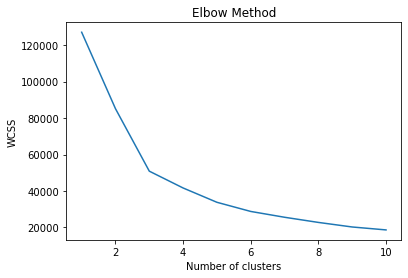

In [117]:
#--------------- Elbow to find see the best number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 


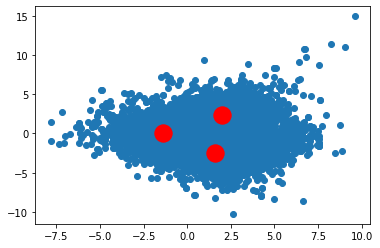

In [119]:
n_cluster = 3
#--------------- Selecting the best n as our n_cluster
kmeans = KMeans(n_cluster, init='k-means++', max_iter=300, n_init=300, random_state=0)
pred_y = kmeans.fit_predict(X)

#--------------- Viz our clusters
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

In [125]:
len(df.columns.tolist()[2:])

19

In [127]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
X = df.values[:, 2:19]
Y = df.values[:, 19]

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
max(model.feature_importances_)

ValueError: Unknown label type: 'continuous'